In [1]:
import os
import numpy as np
import pandas as pd


# plotting modules
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()
    return

In [3]:
meta_activity_map_file = "../data/meta_activity_map.csv"
save_dir = "../data/figures/strength_vs_response"
libraries = ["CC", "ATF2", "CTCF", "FOXA1", "LEF1", "SCRT1", "TCF7L2", "16P12_1"]

In [4]:
meta_df = pd.read_csv(meta_activity_map_file)

In [5]:
cc_decile_ranks, decile_labels = pd.qcut(meta_df.CC, q=10, labels=False, retbins=True)
meta_df["cc_decile"] = cc_decile_ranks

In [6]:
def plot_deciles(plot_df, label, save_file):
    fig,ax = plt.subplots(1,1,figsize=(6, 6))
    ax.bar(plot_df.cc_decile, plot_df[label], width=0.97, color=sns.color_palette("Reds", 15).as_hex()[:10], edgecolor="k")
    xticklabels = [f"{i+1}" for i in range(10)]
    ax.set_xticks(range(10),xticklabels, rotation=0, ha="center", fontsize=14)
    ax.set_xlabel("Activity in CC")
    ax.set_ylabel("Percentage of responsive fragments")
    # g.bar_label([g.containers[i] for i in range])
    rects = ax.patches
    # Make some labels.
    for rect in rects:
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 0.001, f"{round(height, 2)}", ha="center", va="bottom"
        )
    # ax.set_ylim(0, 375)
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(label)
    save_pdf(save_file, fig)
    return

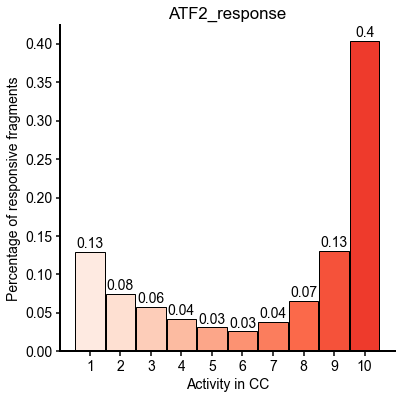

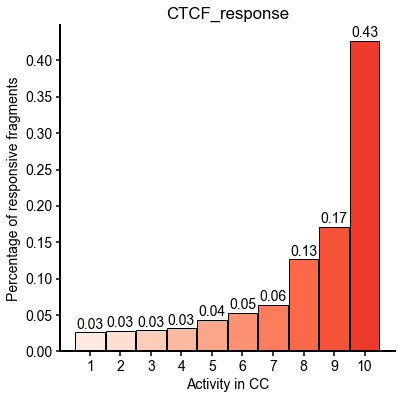

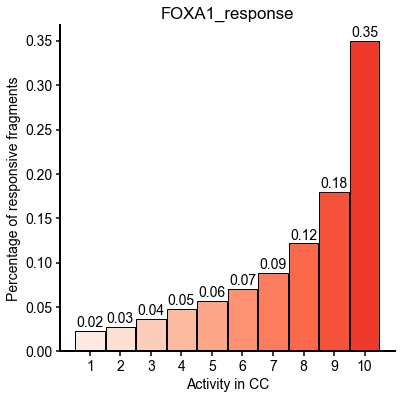

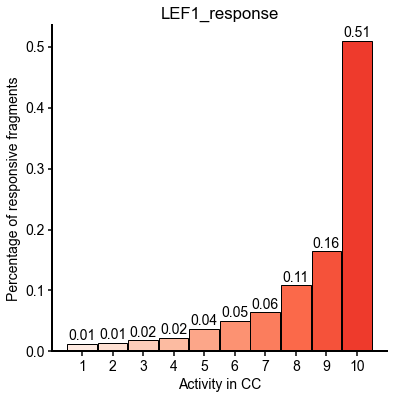

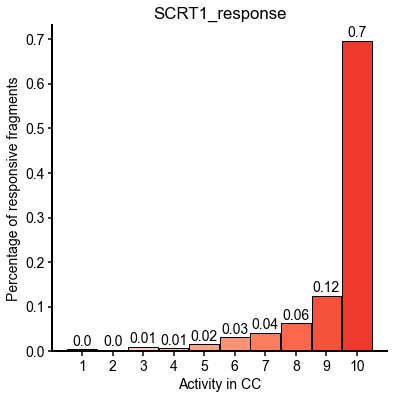

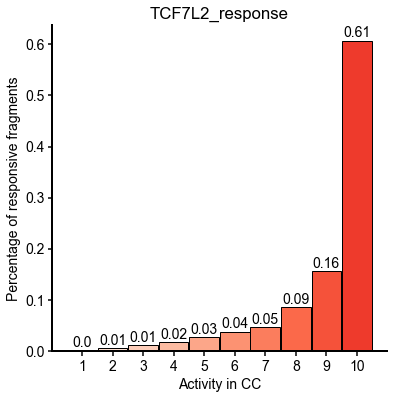

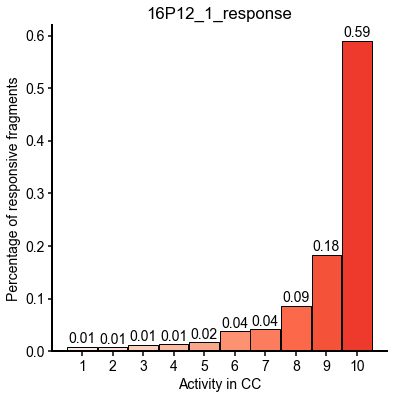

In [7]:
str_response_df_list = []
for ko in libraries[1:]:
    meta_df[f"{ko}_response"] = meta_df[f"{ko}_padj"]<0.01 
    ko_df = meta_df.groupby("cc_decile").agg({f"{ko}_response": sum}).reset_index()
    ko_df[f"{ko}_response"] = ko_df[f"{ko}_response"]/sum(ko_df[f"{ko}_response"])
    str_response_df_list.append(ko_df)
    save_file = os.path.join(save_dir, f"{ko}_SvR.pdf")
    plot_deciles(ko_df, f"{ko}_response", save_file)

In [8]:
str_response_dfs = []
for ko,df in zip(libraries[1:-1], str_response_df_list):
    df["lib"] = ko
    df.columns = ["decile", "response", "lib"]
    str_response_dfs.append(df)

In [9]:
str_response_df = pd.concat(str_response_dfs, axis=0)

Text(0, 0.5, '% Response')

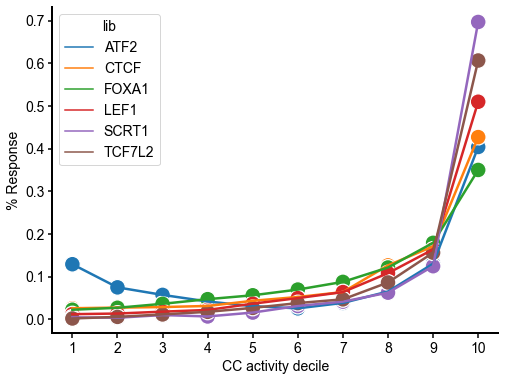

In [10]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

sns.lineplot(
    data=str_response_df,
    x="decile",
    y="response",
    hue="lib",
    linewidth=2.5,
    ax=ax
)

sns.scatterplot(
    data=str_response_df,
    x="decile",
    y="response",
    hue="lib",
    # style="decile",
    ax=ax,
    s=250,
    legend=False
)

ax.spines[['right', 'top']].set_visible(False)
ax.set_xticks(range(0, 10), range(1, 11))
ax.set_xlabel(f"CC activity decile")
ax.set_ylabel(f"% Response")


In [11]:
save_file = "../data/figures/cc_activity_vs_response.pdf"
save_pdf(save_file, fig)